In [1]:
# Dependencies
import numpy as np
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Connect to database
conn = sqlite3.connect('all_features_database.db')
df = pd.read_sql('SELECT * FROM tweets LIMIT 10000', conn)
%time

CPU times: user 6 µs, sys: 2 µs, total: 8 µs
Wall time: 14.3 µs


In [3]:
df.head()

,created_at,favorite_count,id_str,in_reply_to_status_id_str,in_reply_to_user_id_str,in_reply_to_screen_name,lang,retweet_count,retweeted,text,...,"('user', 'location')","('user', 'name')","('user', 'notifications')","('user', 'protected')","('user', 'screen_name')","('user', 'statuses_count')","('user', 'time_zone')","('user', 'url')","('user', 'utc_offset')","('user', 'verified')"
0,Tue Sep 27 08:17:02 +0000 2016,0,780682646854787072,780678380534497281,107695463,johnnymowlem,en,0,0,@johnnymowlem @VirginAtlantic @IMSA @BAR1Motor...,...,London UK,Graham Goodwin,None,0,dsceditor,18873,None,http://www.dailysportscar.com,NaN,0
1,Tue Sep 27 08:17:02 +0000 2016,0,780682647429414912,None,None,None,fr,0,0,RT @JulieThoin: L'audience reprend. Examen du ...,...,Paris,Marc Gehring,None,0,marcgehring,5887,Paris,None,7200.0,0
2,Tue Sep 27 08:17:04 +0000 2016,0,780682655104991232,780678391846625280,165883353,gforsterphoto,en,0,0,Flew into Gatwick last night. 5 hour drive nor...,...,Co . Durham,Nicola Jayne Little,None,0,NicolaJSparkles,35910,Casablanca,http://www.sparklecommunications.co.uk,3600.0,0
3,Tue Sep 27 08:17:11 +0000 2016,0,780682685761093632,None,None,None,en,0,0,"👎🏼 what is with Italy...#nopassport control, I...",...,London,Brightlights01,None,0,brightlights01,564,London,http://www.catsofnorthlondon.blogspot.com,3600.0,0
4,Tue Sep 27 08:17:21 +0000 2016,0,780682727993507840,None,None,None,fr,0,0,Qqun a déjà voyagé avec RyanAir ici ?,...,"Nancy, France",Eloïse 🔥,None,0,ThaNicki_,308,None,None,NaN,0


In [30]:
from datetime import datetime

df['created_at'][:5][:10]

0    Tue Sep 27 08:17:02 +0000 2016
1    Tue Sep 27 08:17:02 +0000 2016
2    Tue Sep 27 08:17:04 +0000 2016
3    Tue Sep 27 08:17:11 +0000 2016
4    Tue Sep 27 08:17:21 +0000 2016
Name: created_at, dtype: object

In [4]:
df.columns

Index(['created_at', 'favorite_count', 'id_str', 'in_reply_to_status_id_str',
       'in_reply_to_user_id_str', 'in_reply_to_screen_name', 'lang',
       'retweet_count', 'retweeted', 'text', 'timestamp_ms', 'truncated',
       '('user', 'created_at')', '('user', 'default_profile')',
       '('user', 'description')', '('user', 'favourites_count')',
       '('user', 'follow_request_sent')', '('user', 'followers_count')',
       '('user', 'following')', '('user', 'friends_count')',
       '('user', 'geo_enabled')', '('user', 'id_str')', '('user', 'lang')',
       '('user', 'listed_count')', '('user', 'location')', '('user', 'name')',
       '('user', 'notifications')', '('user', 'protected')',
       '('user', 'screen_name')', '('user', 'statuses_count')',
       '('user', 'time_zone')', '('user', 'url')', '('user', 'utc_offset')',
       '('user', 'verified')'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 34 columns):
created_at                         10000 non-null object
favorite_count                     10000 non-null int64
id_str                             10000 non-null object
in_reply_to_status_id_str          2358 non-null object
in_reply_to_user_id_str            2922 non-null object
in_reply_to_screen_name            2922 non-null object
lang                               10000 non-null object
retweet_count                      10000 non-null int64
retweeted                          10000 non-null int64
text                               10000 non-null object
timestamp_ms                       10000 non-null object
truncated                          10000 non-null int64
('user', 'created_at')             10000 non-null object
('user', 'default_profile')        10000 non-null int64
('user', 'description')            8036 non-null object
('user', 'favourites_count')       10000 non-n

In [6]:
df.describe()

,favorite_count,retweet_count,retweeted,truncated,"('user', 'default_profile')","('user', 'favourites_count')","('user', 'followers_count')","('user', 'friends_count')","('user', 'geo_enabled')","('user', 'listed_count')","('user', 'protected')","('user', 'statuses_count')","('user', 'utc_offset')","('user', 'verified')"
count,10000.0,10000.0,10000.0,10000.0000,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.0,1.000000e+04,6510.000000,10000.000000
mean,0.0,0.0,0.0,0.0184,0.405100,4908.158200,1.155402e+05,6407.309600,0.375600,762.277000,0.0,1.318585e+05,875.806452,0.135700
std,0.0,0.0,0.0,0.1344,0.490936,19192.550747,3.866950e+05,18920.131395,0.484302,2177.596305,0.0,2.921180e+05,14317.198694,0.342487
min,0.0,0.0,0.0,0.0000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.0,1.000000e+00,-39600.000000,0.000000
25%,0.0,0.0,0.0,0.0000,0.000000,13.000000,1.170000e+02,114.000000,0.000000,6.000000,0.0,1.661000e+03,-7200.000000,0.000000
50%,0.0,0.0,0.0,0.0000,0.000000,216.000000,5.820000e+02,490.000000,0.000000,43.000000,0.0,1.118450e+04,7200.000000,0.000000
75%,0.0,0.0,0.0,0.0000,1.000000,2379.000000,2.722000e+03,1448.000000,1.000000,212.000000,0.0,8.171200e+04,7200.000000,0.000000
max,0.0,0.0,0.0,1.0000,1.000000,331775.000000,2.200884e+06,161044.000000,1.000000,13161.000000,0.0,1.718749e+06,46800.000000,1.000000


TypeError: xlabel() missing 1 required positional argument: 's'

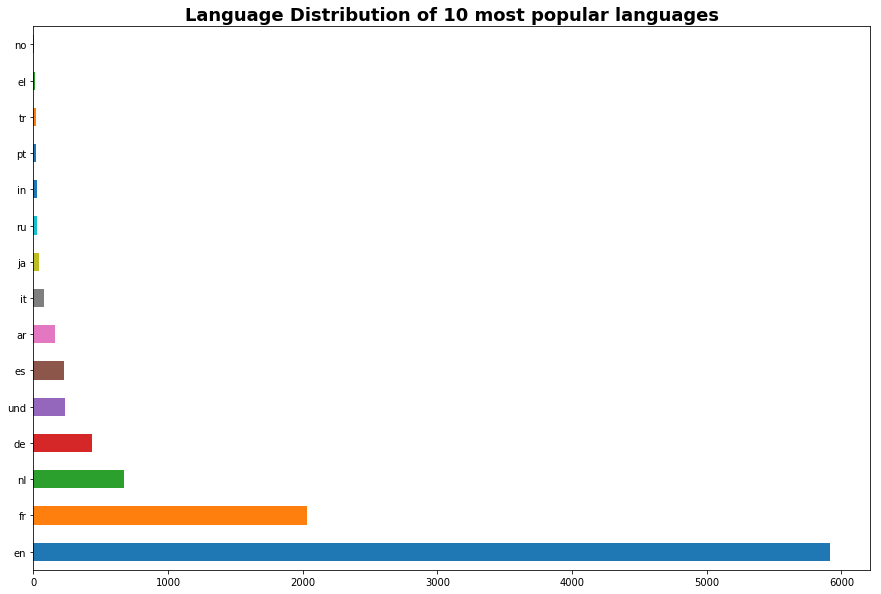

In [7]:
df['lang'].value_counts().sort_values(ascending=False)[:15].plot(kind='barh', 
                                                                 figsize=(15,10))
plt.title('Language Distribution of 10 most popular languages', weight='bold', fontsize=18)
plt.xlabel()

In [ ]:
# Basic Tweet analysis
from textblob import TextBlob
tweet = df['text'][2]
print(tweet)
analysis = TextBlob(tweet)
print(f'Polarity: {analysis.sentiment[0]}, Subjectivity: {analysis.sentiment[1]}')

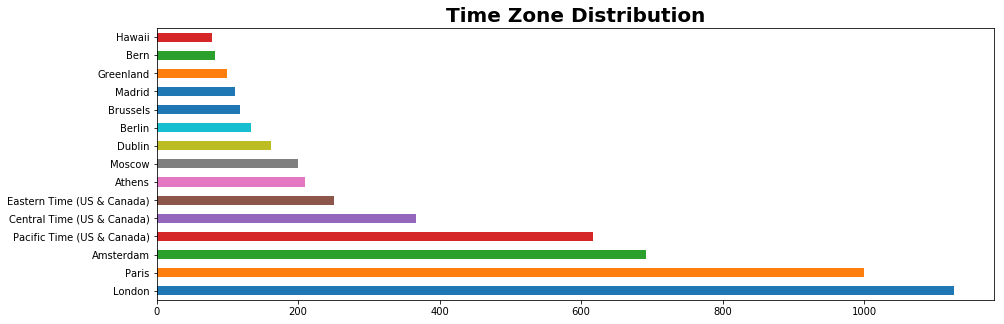

In [8]:
df["('user', 'time_zone')"].value_counts()[:15].plot(kind='barh', figsize=(15,5))
plt.title('Time Zone Distribution', weight='bold', fontsize=20);

In [9]:
# Example tweets
df['text'][:5]

0    @johnnymowlem @VirginAtlantic @IMSA @BAR1Motor...
1    RT @JulieThoin: L'audience reprend. Examen du ...
2    Flew into Gatwick last night. 5 hour drive nor...
3    👎🏼 what is with Italy...#nopassport control, I...
4                Qqun a déjà voyagé avec RyanAir ici ?
Name: text, dtype: object